In [3]:
pip install pandas matplotlib

Note: you may need to restart the kernel to use updated packages.


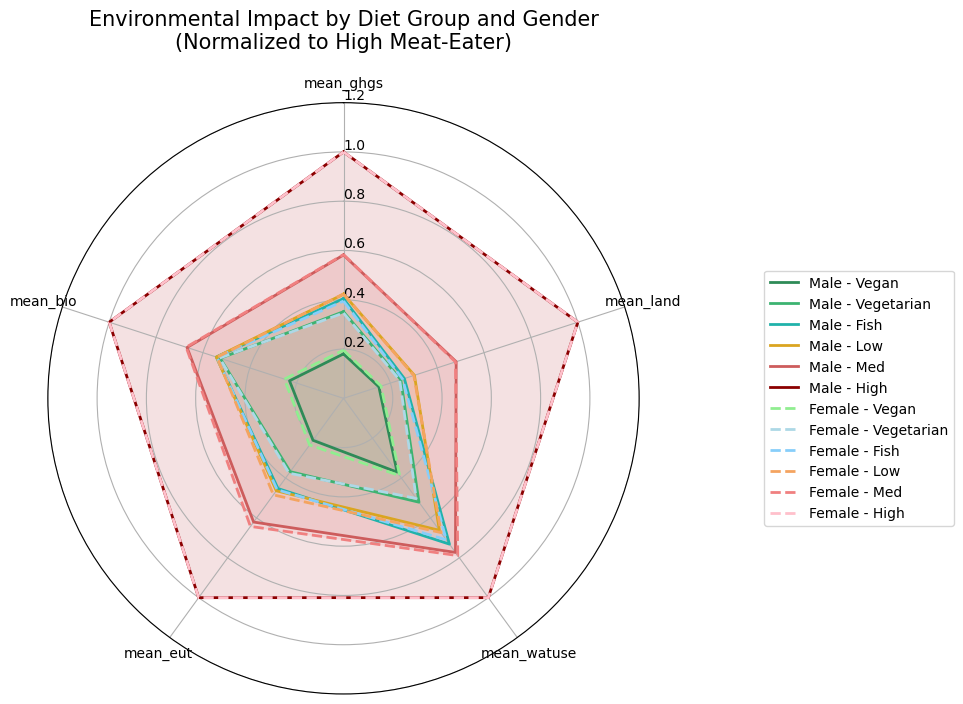

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("Results_21MAR2022_nokcaladjust.csv")

rename_mapping = {
    'vegan': 'vegan',
    'veggie': 'vegetarian',
    'fish': 'fish',
    'meat50': 'low',
    'meat': 'med',
    'meat100': 'high'
}
df['diet_group'] = df['diet_group'].map(rename_mapping)

columns_needed = ['diet_group', 'sex', 'mean_ghgs', 'mean_land', 'mean_watuse', 'mean_eut', 'mean_bio']
df_sex_grouped = df[columns_needed].groupby(['diet_group', 'sex']).mean().reset_index()

df_male = df_sex_grouped[df_sex_grouped['sex'] == 'male'].set_index('diet_group')
df_female = df_sex_grouped[df_sex_grouped['sex'] == 'female'].set_index('diet_group')

order = ['vegan', 'vegetarian', 'fish', 'low', 'med', 'high']
df_male = df_male.loc[order]
df_female = df_female.loc[order]

df_male_norm = df_male.drop(columns='sex') / df_male.loc['high'].drop('sex')
df_female_norm = df_female.drop(columns='sex') / df_female.loc['high'].drop('sex')

labels = df_male_norm.columns.tolist()
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

colors_male = ['#2E8B57', '#3CB371', '#20B2AA', '#DAA520', '#CD5C5C', '#8B0000']
colors_female = ['#90EE90', '#ADD8E6', '#87CEFA', '#F4A460', '#F08080', '#FFC0CB']

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

for i, group in enumerate(order):
    values = df_male_norm.loc[group].tolist()
    values += values[:1]
    ax.plot(angles, values, label=f"Male - {group.capitalize()}", color=colors_male[i], linewidth=2)
    ax.fill(angles, values, color=colors_male[i], alpha=0.1)

for i, group in enumerate(order):
    values = df_female_norm.loc[group].tolist()
    values += values[:1]
    ax.plot(angles, values, label=f"Female - {group.capitalize()}", color=colors_female[i], linewidth=2, linestyle='--')
    ax.fill(angles, values, color=colors_female[i], alpha=0.1)

ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles[:-1]), labels)
ax.set_rlabel_position(0)
ax.set_ylim(0, 1.2)
ax.set_title("Environmental Impact by Diet Group and Gender\n(Normalized to High Meat-Eater)", size=15, pad=20)
plt.legend(loc='center left', bbox_to_anchor=(1.2, 0.5))
plt.tight_layout()
plt.show()


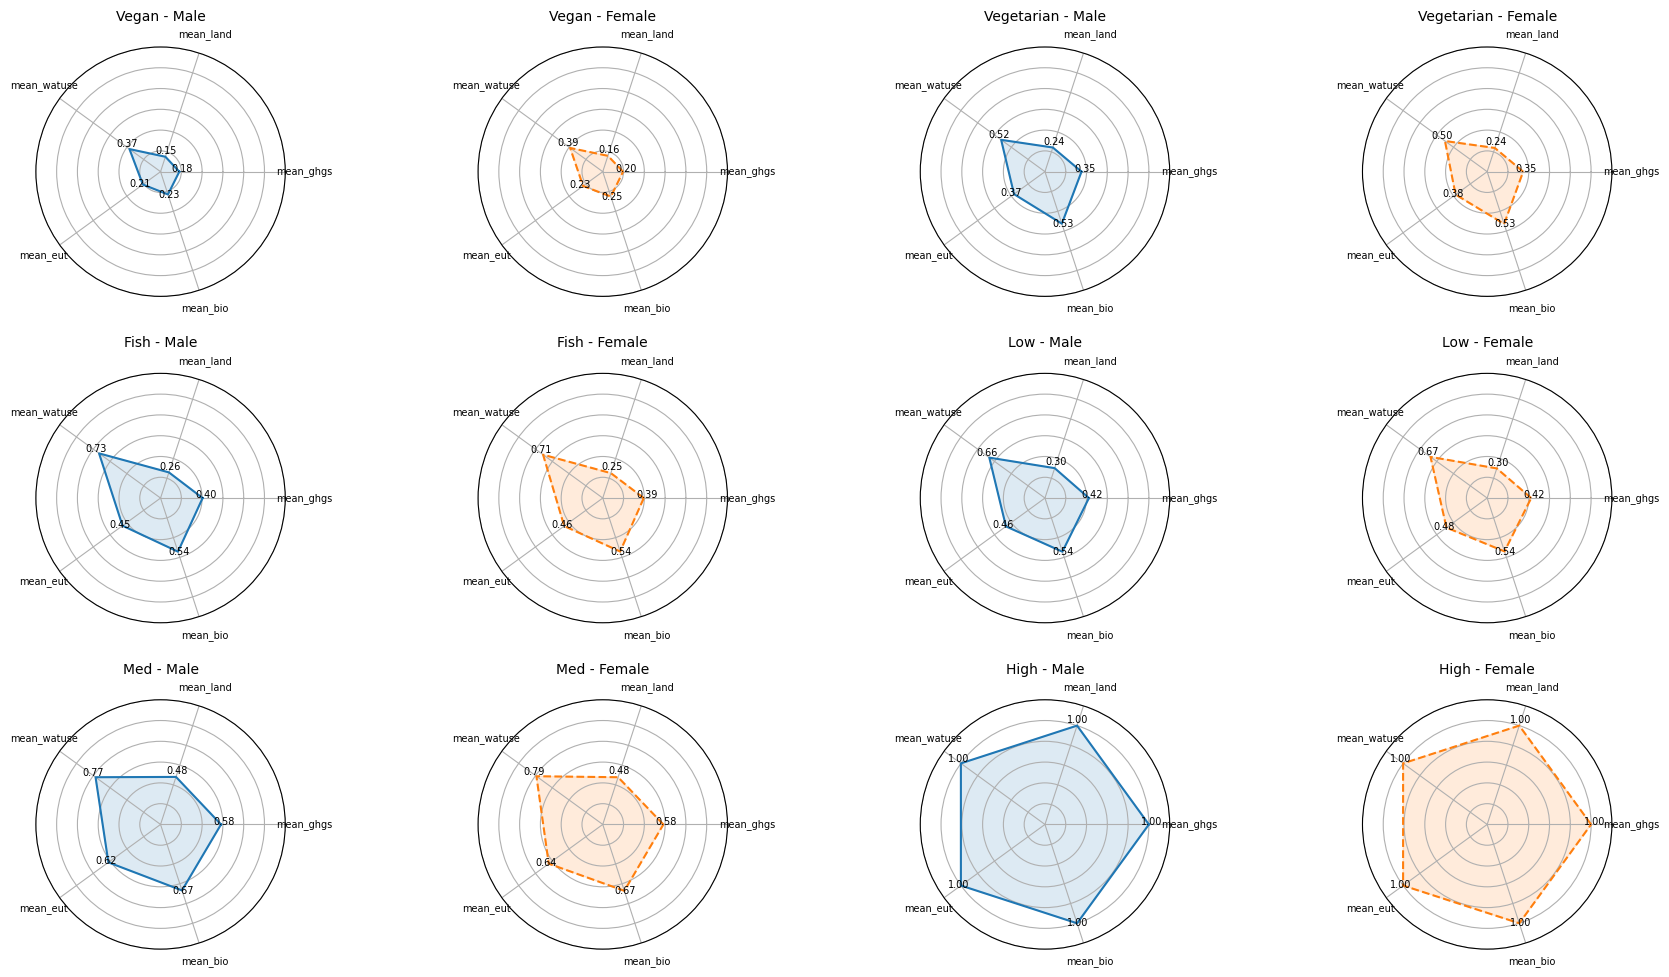

In [11]:
categories = df_male_norm.columns.tolist()
angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
angles += angles[:1]

male_color = "#1f77b4"
female_color = "#ff7f0e"

fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(18, 10), subplot_kw=dict(polar=True))

for i, group in enumerate(order):
    row = i // 2
    col = (i % 2) * 2

    vm = df_male_norm.loc[group].tolist()
    vm_c = vm + [vm[0]]
    ax_m = axs[row, col]
    ax_m.plot(angles, vm_c, color=male_color, linewidth=1.5)
    ax_m.fill(angles, vm_c, color=male_color, alpha=0.15)
    for j, val in enumerate(vm):
        ax_m.text(angles[j], val + 0.03, f"{val:.2f}", fontsize=7, ha='center')
    ax_m.set_title(f"{group.capitalize()} - Male", fontsize=10)
    ax_m.set_ylim(0, 1.2)
    ax_m.set_xticks(angles[:-1])
    ax_m.set_xticklabels(categories, fontsize=7)
    ax_m.set_yticklabels([])

    vf = df_female_norm.loc[group].tolist()
    vf_c = vf + [vf[0]]
    ax_f = axs[row, col + 1]
    ax_f.plot(angles, vf_c, color=female_color, linewidth=1.5, linestyle='--')
    ax_f.fill(angles, vf_c, color=female_color, alpha=0.15)
    for j, val in enumerate(vf):
        ax_f.text(angles[j], val + 0.03, f"{val:.2f}", fontsize=7, ha='center')
    ax_f.set_title(f"{group.capitalize()} - Female", fontsize=10)
    ax_f.set_ylim(0, 1.2)
    ax_f.set_xticks(angles[:-1])
    ax_f.set_xticklabels(categories, fontsize=7)
    ax_f.set_yticklabels([])

fig.tight_layout(pad=1.5)
plt.savefig("radar_matrix_grid_refined.png", dpi=300)
plt.show()
